In [145]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
titanic = pd.read_csv('titanic.csv')
titanic.head()
titanic.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
154,0,3,male,NaN,0,0,7.3125,S,Third,man,True,NaN,Southampton,no,True
142,1,3,female,24.0,1,0,15.8500,S,Third,woman,False,NaN,Southampton,yes,False
274,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
406,0,3,male,51.0,0,0,7.7500,S,Third,man,True,NaN,Southampton,no,True
675,0,3,male,18.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True


In [146]:
fun ={'who':'count','age':'mean'}
groupbyClass = titanic.groupby('class').agg(fun)
#groupbyClass = groupbyClass.reset_index()
groupbyClass

,who,age
class,,
First,216,38.233441
Second,184,29.877630
Third,491,25.140620


In [147]:
groupbyClass = titanic.groupby('class').agg(fun)
groupbyClass.rename(
    columns={"who":"passengers", "age":"average age"},
    inplace = True
    )
groupbyClass = groupbyClass.reset_index()
groupbyClass

,class,passengers,average age
0,First,216,38.233441
1,Second,184,29.877630
2,Third,491,25.140620


In [148]:
fun2 = {'who':'count','age':{'mean', 'min', 'max'}} 
groupbyClass2 = titanic.groupby('class').agg(fun2)

# It’s incomplete, add in the renaming here (or later) groupbyClass2
groupbyClass2

who   age                 
       count   max       mean   min
class                              
First    216  80.0  38.233441  0.92
Second   184  70.0  29.877630  0.67
Third    491  74.0  25.140620  0.42

In [149]:
groupbyClass2 = groupbyClass2.reset_index()
# turn 'class' groups into column values
groupbyClass2

class   who   age                 
          count   max       mean   min
0   First   216  80.0  38.233441  0.92
1  Second   184  70.0  29.877630  0.67
2   Third   491  74.0  25.140620  0.42

In [150]:
groupbyClass2.columns = groupbyClass2.columns.droplevel(0) 
# drop the top level in the column hierarchy
groupbyClass2

,,count,max,mean,min
0,First,216,80.0,38.233441,0.92
1,Second,184,70.0,29.877630,0.67
2,Third,491,74.0,25.140620,0.42


In [151]:
groupbyClass2.rename(columns = {'':'class',
                                'max':'maximun_age',
                                'min':'minimun_age',
                                'mean':'average_age'
                                },
                    inplace = True
                    ) # rename the first column to be 'class'
groupbyClass2

,class,count,maximun_age,average_age,minimun_age
0,First,216,80.0,38.233441,0.92
1,Second,184,70.0,29.877630,0.67
2,Third,491,74.0,25.140620,0.42


In [152]:
my_list = (80,20,64,19,56,12,88)
sum(e>50 for e in my_list)

4

In [153]:
fun3 = {'age':{'nunique',lambda x: sum(e>50 for e in x)}}
groupbyClass3 = titanic.groupby('class').agg(fun3).reset_index()
# turn groups into column values
groupbyClass3.columns = groupbyClass3.columns.droplevel(0)
groupbyClass3
# drop the top level in column hierarchy
groupbyClass3.rename(
    columns = {'':'class',
        'nunique':'unique age count',
        '<lambda_0>':'over 50s count'},
    inplace = True
)
groupbyClass3
# print out the table

,class,over 50s count,unique age count
0,First,39,57
1,Second,15,57
2,Third,10,68


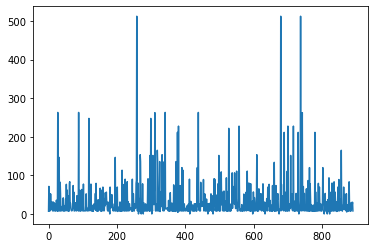

In [154]:
plt.plot(titanic.fare)
plt.show()

In [155]:
len(titanic)

891

(0.0, 300.0)

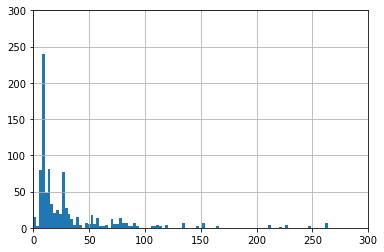

In [156]:
titanic.fare.hist(bins = 200) # try different numbers of bins
plt.xlim(0,300) # setting limit on x-axis
plt.ylim(0,300) # setting limit on y-axis

(0.0, 300.0)

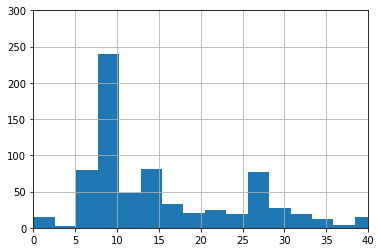

In [157]:
titanic.fare.hist(bins = 200) # try different numbers of bins
plt.xlim(0,40) # setting limit on x-axis
plt.ylim(0,300) # setting limit on y-axis

(0.0, 600.0)

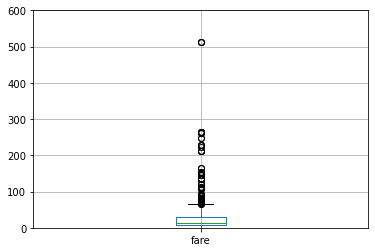

In [158]:
titanic.boxplot(column = "fare")
plt.ylim(0,600) #setting limit on y-axis

(0.0, 600.0)

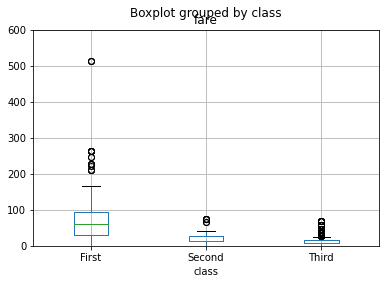

In [159]:
titanic.boxplot(column = 'fare', by = 'class')
plt.ylim(0, 600)

(0.0, 600.0)

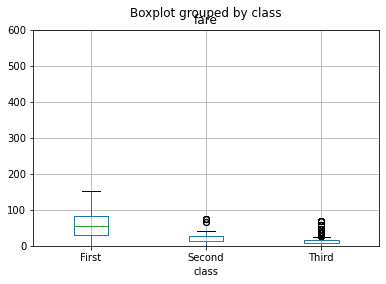

In [160]:
filt = ~((titanic['class'] == 'First') & (titanic['fare'] > 160))
titanic = titanic[filt]
titanic.boxplot(column = 'fare', by = 'class')
plt.ylim(0, 600)


(0.0, 160.0)

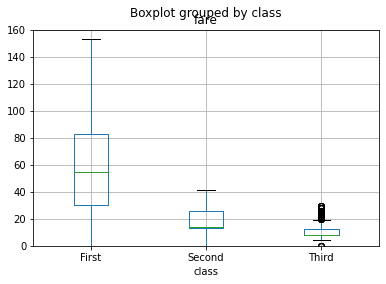

In [161]:
filt1 = ~((titanic['class'] == 'Second') & (titanic['fare'] > 50))
titanic = titanic[filt1]
filt2 = ~((titanic['class'] == 'Third') & (titanic['fare'] > 30))
titanic = titanic[filt2]
titanic.boxplot(column = 'fare', by = 'class')
plt.ylim(0, 160)

In [162]:
fun_child_adult = {'age':{lambda x: sum(e<18 for e in x), lambda x: sum(e>=18 for e in x)}}
groupbyClass2 = titanic.groupby('class').agg(fun_child_adult).reset_index()

# The column names will be meaningless, so you may want to rename them.
groupbyClass2.columns = groupbyClass2.columns.droplevel(0)
groupbyClass2.rename(
    columns = {
        '' :'class',
        '<lambda_0>':'child count',
        '<lambda_1>':'adult count'
    },
    inplace = True
)
groupbyClass2

,class,child count,adult count
0,First,155,11
1,Second,143,23
2,Third,266,58


Text(0.5, 1.0, 'Passengers ticket class based on their adulthood')

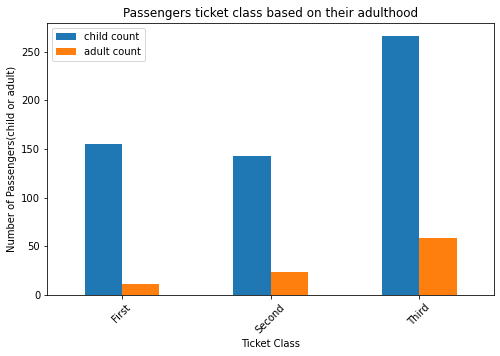

In [163]:
ax=groupbyClass2.plot.bar(figsize=(8,5))
# figsize sets size of plot
ax.set_xticklabels(groupbyClass2['class'],rotation=45)
# use values of column 'class' as the x axis labels. Remove this line of code to see what will happen if we do not have this line
plt.xlabel('Ticket Class')
# setting a label for x axis
plt.ylabel('Number of Passengers(child or adult)')
# Setting a label for y axis
plt.title('Passengers ticket class based on their adulthood') # Setting the title of chart


In [165]:
df = pd.DataFrame(
    {
    'Name' :['Mike','Aaron','Brad','Steve','George','Mitchell','Shaun','Glenn','Pa t','Robert','David'],
    'Age' : [39,28,44,25,32,33,31,26,22,25,28],
    'Runs' :[1310,662,1403,828,672,1140,655,1040,557,1030,1140]
    })
df

,Name,Age,Runs
0,Mike,39,1310
1,Aaron,28,662
2,Brad,44,1403
3,Steve,25,828
4,George,32,672
5,Mitchell,33,1140
6,Shaun,31,655
7,Glenn,26,1040
8,Pa t,22,557
9,Robert,25,1030


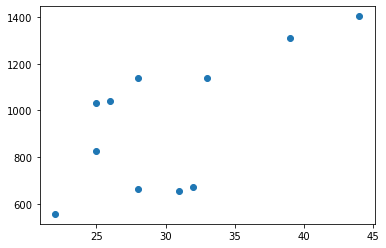

In [166]:
plt.scatter(df['Age'], df['Runs'])
plt.show()